In [1]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
#Loading the dataset and creating a Dataframe
df = pd.read_csv('Advertising.csv')

df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
#Dropping Unwanted column - Id column is of no use
df = df.drop(["Unnamed: 0"],axis=1)

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
#Checking Size of Dataframe
df.size

800

In [6]:
#Checking Dataframe Size
df.shape

(200, 4)

In [7]:
#Checking Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
#Describing Dataframe
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
#Checking the Dataframe for Null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

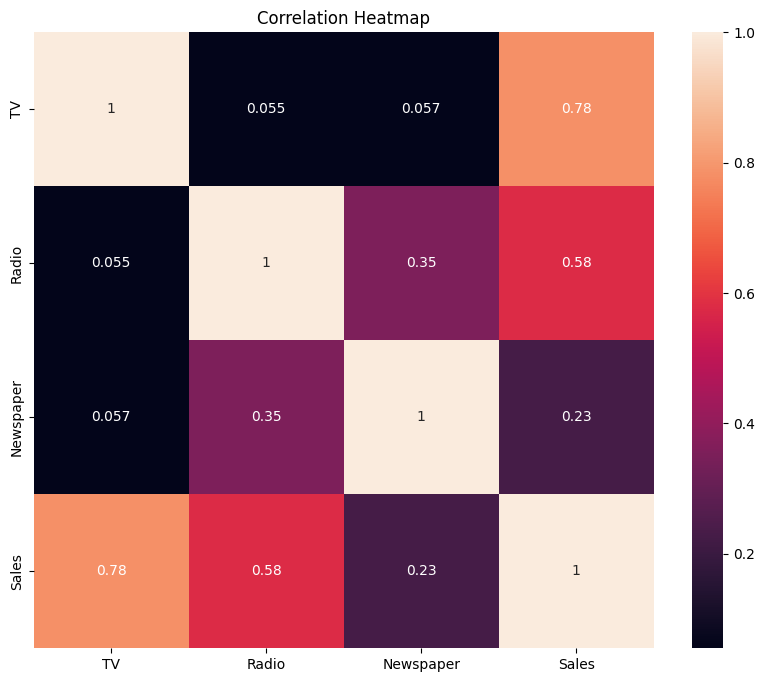

In [16]:
#Creating a Heatmap to check cor-relation

#Setting size and Index for the Heatmap
plt.figure(figsize=(10, 8))
plt.title("Correlation Heatmap")

#Creaeting Heatmap
sns.heatmap(df.corr(),annot=True)
plt.show()

In [19]:
#Plotting Scatter plot for TV vs Sales
px.scatter(df, x='TV', y='Sales', width=850, height=500, title='TV vs Sales')

In [20]:
#Plotting Scatter plot for Radio vs Sales
px.scatter(df, x='Radio', y='Sales', width=850, height=500, title='Radio vs Sales')

In [21]:
#Plotting Scatter plot for Newspaper vs Sales
px.scatter(df, x='Newspaper', y='Sales', width=850, height=500, title='Newspaper vs Sales')

**Training the Model**

In [23]:
#Creating X variable
x = df.iloc[:, 0:3]
print(x)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [24]:
#Creating Y Variable
y = df.iloc[:, -1]
print(y)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


In [26]:
# Importing Necessary Library for Training Data
from sklearn.model_selection import train_test_split

In [27]:
#Splitting The Data Into Test And Train Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [28]:
#Training the Model using Linear Regression
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

**Prediction using Data**

In [29]:
#Generating Predection
y_pred = model.predict(x_test)
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

**Evaluating the Model created**

In [30]:
#Obtain the intercept of the linear model
model.intercept_

2.979067338122629

In [36]:
#Retrieve the coefficients (slopes) of the linear model
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [35]:
#Importing Library
from sklearn import metrics

#Checking Mean Absolute Error
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_pred, y_test))

Mean Absolute Error:  1.4607567168117603


In [33]:
#Root Mean Squared Error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_pred, y_test)))

Root Mean Squared Error: 1.78159966153345


In [34]:
# R-Squared Test
print('R-Squared: ', metrics.r2_score(y_pred, y_test))

R-Squared:  0.8791069137120033


**Actual Sales and Prediction Sales Comparision**

In [38]:
#Comparing values
act_pred = pd.DataFrame({'Actual':y_test.values.flatten(), 'Predict':y_pred.flatten()})
act_pred

,Actual,Predict
0,16.9,16.408024
1,22.4,20.889882
2,21.4,21.553843
3,7.3,10.608503
4,24.7,22.112373
5,12.6,13.105592
6,22.3,21.057192
7,8.4,7.461010
8,11.5,13.606346
9,14.9,15.155070


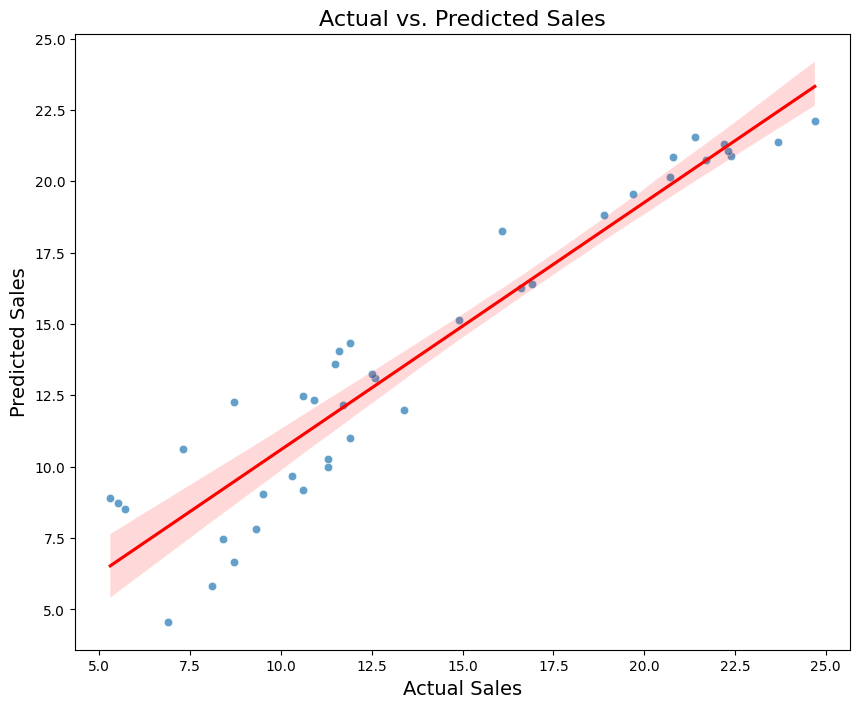

In [49]:
#Creating a Scatterplot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=act_pred, x='Actual', y='Predict', alpha=0.7)

#Adding Linear Regression Line as Red
sns.regplot(data=act_pred, x='Actual', y='Predict', scatter=False, color='red')

#Customizing Appearance
plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.title('Actual vs. Predicted Sales', fontsize=16)

#Show the plot
plt.show()

Based on the Above Analysis:
1. I have used the Advertising Dataset in order to perform this task of Sales Prediction.
2. Successfully performed the Analysis and Visualization of the given Dataset.
3. Trained the model using Linear Regression Algorithm and predicted the values.
4. Finally, made a visualization of actual and predicted values using Scatterplot chart.